In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('new-thyroid.data')
y = data.iloc[:, 0].values  # Class (1 = normal, 2 = hyper, 3 = hypo)

# Select the independent variables (columns 3, 4, 5, and 6)
X = data.iloc[:, 2:6].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [12]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train,y_train)


GaussianNB()

ValueError: X has 2 features, but StandardScaler is expecting 4 features as input.

In [13]:
y_pred=classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[3 3]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [1 2]
 [1 1]]


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[28  0  0]
 [ 4  5  0]
 [ 0  0  6]]


0.9069767441860465

<ipython-input-20-42fbd0063cb4>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


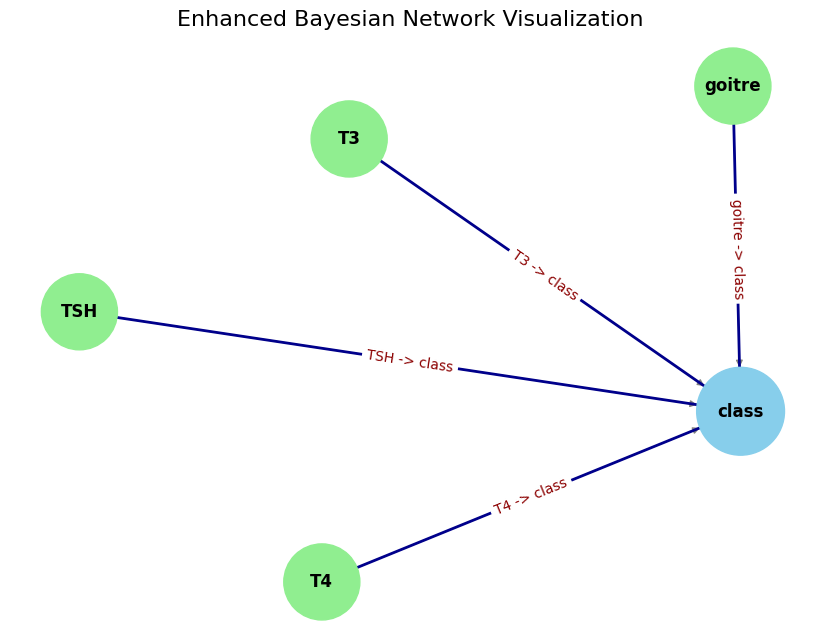

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the structure of a simple Bayesian Network
edges = [('T3', 'class'), ('T4', 'class'), ('TSH', 'class'), ('goitre', 'class')]

# Create a directed graph
G = nx.DiGraph()

# Add edges (arcs) between nodes (features and class)
G.add_edges_from(edges)

# Define positions for the nodes in the graph for better visualization
pos = nx.spring_layout(G, seed=42)  # Seed ensures consistent layout between runs

# Draw the graph with better aesthetics
plt.figure(figsize=(8, 6))

# Define node colors based on their position in the graph
node_colors = ['skyblue' if node == 'class' else 'lightgreen' for node in G.nodes()]

# Draw nodes with larger size for 'class' and smaller for features
nx.draw(G, pos, with_labels=True, node_size=[4000 if node == 'class' else 3000 for node in G.nodes()],
        node_color=node_colors, font_size=12, font_weight='bold', arrows=True, edge_color='gray')

# Adjust edge widths and styles for better visibility
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, width=2, edge_color='darkblue')

# Draw edge labels with customized font size and colors
edge_labels = {('T3', 'class'): 'T3 -> class',
               ('T4', 'class'): 'T4 -> class',
               ('TSH', 'class'): 'TSH -> class',
               ('goitre', 'class'): 'goitre -> class'}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='darkred')

# Add title and adjust layout
plt.title("Enhanced Bayesian Network Visualization", fontsize=16)
plt.axis('off')  # Turn off the axis for cleaner look
plt.tight_layout()
plt.show()
